# Chapter 2 Introduction

Conclusions often echo introductions. This chapter was completed at the very end of the writing of the book. It outlines principles and ideas that are probably more relevant than the sum of technical details covered subsequently.

When stuck with disappointing results, we advise the reader to take a step away from the algorithm and come back to this section to get a broader perspective of some of the issues in predictive modelling.

## 2.1 Context

The blossoming of machine learning in factor investing has it source at the confluence of three favorable developments: data availability, computational capacity, and economic groundings.

### 1. The data
Nowadays, classical providers, such as Bloomberg and Reuters have seen their playing field invaded by niche players and aggregation platforms. In addition, high-frequency data and derivative quotes have become mainstream. Hence, firm-specific attributes are easy and often cheap to compile.

This means that the size of $X$ in (2.1) is now sufficiently large to be plugged into ML algorithms. The order of magnitude (in 2019) that can be reached is the following: a few hundred monthly observations over several thousand stocks (US listed at least) covering a few hundred attributes. This makes a dataset of dozens of millions of points.

While it is a reasonably high figure, we highlight that the chronological depth is probably the weak point and will remain so for decades to come because accounting figures are only released on a quarterly basis. Needless to say that this drawback does not hold for high-frequency strategies.

### 2. Computational power

Storage and processing speed are not technical hurdles anymore and models can even be run on the cloud thanks to services hosted by major actors (Amazon, Microsoft, IBM and Google) and by smaller players (Rackspace, Techila) 

On the software side, open source has become the norm, funded by corporations (TensorFlow & Keras by Google, Pytorch by Facebook, h2o, etc.), universities (Scikit-Learn by INRIA, NLPCore by Stanford, NLTK by UPenn) and small groups of researchers (caret, xgboost, tidymodels to list but a pair of frameworks). Consequently, ML is no longer the private turf of a handful of expert computer scientists, but is on the contrary accessible to anyone willing to learn and code.

### 3. Economic framing

Machine learning applications in finance were initially introduced by computer scientists and information system experts (e.g., Braun and Chandler (1987), White (1988)) and exploited shortly after by academics in financial economics (Bansal and Viswanathan (1993)), and hedge funds (see, e.g., Zuckerman (2019)). Nonlinear relationships then became more mainstream in asset pricing (Freeman and Tse (1992), Bansal, Hsieh, and Viswanathan (1993)). 

These contributions started to pave the way for the more brute-force approaches that have blossomed since the 2010 decade and which are mentioned throughout the book.

In the synthetic proposal of R. Arnott, Harvey, and Markowitz (2019), **the first piece of advice is to rely on a model that makes sense economically**. We agree with this stance, and the only assumption that we make in this book is that future returns depend on firm characteristics. The relationship between these features and performance is largely unknown and probably time-varying. **This is why ML can be useful: to detect some hidden patterns beyond the documented asset pricing anomalies.** Moreover, dynamic training allows to adapt to changing market conditions.

## 2.2 Portfolio construction: the workflow

Building successful portfolio strategies requires many steps. This book covers many of them but focuses predominantly on the **prediction part**. Indeed, allocating to assets most of the time requires to make bets and thus to presage and foresee which ones will do well and which ones will not. In this book, we mostly resort to **supervised learning** to forecast returns in the cross-section. The baseline equation in supervised learning,

$$
y=f(X)+\epsilon
$$

is translated in financial terms as

$$
r_{t+1,n}=f(X_{t,n})+\epsilon_{t+1,n}
$$

where $f(X_{t,n})$ can be viewed as the expected return for time $t+1$ computed at time $t$, that is, $E(r_{t+1,n})$. Note that the model is common to all assets ($f$ is not indexed by $n$), thus it shares similarity with panel approaches.

Building accurate predictions requires to pay attention to **all** terms in the above equation.

Chronologically, **the first step is to gather data and to process it (see Chapter 4)**. To the best of our knowledge, the only consensus is that, on the $x$ side, the features should include classical predictors reported in the literature: market capitalization, accounting ratios, risk measures, momentum proxies (see Chapter 3).For the dependent variable, many researchers and practitioners work with monthly returns, but other maturities may perform better out-of-sample.


While it is tempting to believe that the most crucial part is the choice of $f$ (it is the most sophisticated, mathematically), **we believe that the choice and engineering of inputs, that is, the variables, are at least as important**. The usual modelling families for $f$ are covered in Chapters 5 to 9. Finally, the errors $\epsilon_{t+1,n}$ are often overlooked. People consider that vanilla quadratic programming is the best way to go (the most common for sure!), thus **the mainstream objective is to minimize squared errors**. In fact, other options may be wiser choices (see for instance Section 7.4.3).

Even if the overall process, depicted in Figure 2.1, seems very sequential, it is more judicious to conceive it as integrated. All steps are intertwined and each part should not be dealt with independently from the others. The global framing of the problem is essential, from the choice of predictors, to the family of algorithms, not to mention the portfolio weighting schemes (see Chapter 12 for the latter).

![title](fig/fig1.png)


## 2.3 Machine learning is no magic wand

By definition, the curse of predictions is that **they rely on past data to infer patterns about subsequent fluctuations. The more or less explicit hope of any forecaster is that the past will turn out to be a good approximation of the future**. Needless to say, this is a pious wish; in general, predictions fare badly. Surprisingly, this does not depend much on the sophistication of the econometric tool. In fact, heuristic guesses are often hard to beat.

To illustrate this sad truth, the baseline algorithms that we detail in Chapters 5 to 7 yield at best mediocre results. This is done on purpose. This forces the reader to understand that **blindly feeding data and parameters to a coded function will seldom suffice to reach satisfactory out-of-sample accuracy**.

Below, we sum up some key points that we have learned through our exploratory journey in financial ML.

- The first point is that causality is key. 

- Thus, researchers have most of the time to make do with simple correlation patterns, which are far less informative and robust.

- Relatedly, financial datasets are extremely noisy. 

- Data is key. The inputs given to the models are probably much more important than the choice of the model itself.

- To maximize out-of-sample efficiency, the right question is probably to paraphrase Jeff Bezos: what’s not going to change? Persistent series are more likely to unveil enduring patterns.

- Everybody makes mistakes. Errors in loops or variable indexing are part of the journey. What matters is to learn from those lapses.

To conclude, we remind the reader of this obvious truth: **nothing will ever replace practice**. Gathering and cleaning data, coding backtests, tuning ML models, testing weighting schemes, debugging, starting all over again: these are all absolutely indispensable steps and tasks that must be repeated indefinitely. There is no substitute to experience.

# Chapter 4 Data preprocessing

The methods we describe in this chapter are driven by **financial applications**. For an introduction to non-financial data processing, we recommend two references: chapter 3 from the general purpose ML book by Boehmke and Greenwell (2019) and the monograph on this dedicated subject by Kuhn and Johnson (2019).

## 4.1 Know your data

The first step, as in any quantitative study, is obviously to **make sure the data is trustworthy**

The second step is to have a look at summary statistics: ranges (minimum and maximum values), and averages and medians. Histograms or plots of time series carry of course more information but cannot be analyzed properly in high dimensions.

Often, the number of predictors is so large that it is unpractical to look at these simple metrics. A minimal verification is recommended. To further ease the analysis:

- focus on a subset of predictors, e.g., the ones linked to the most common factors (market-capitalization, price-to-book or book-to-market, momentum (past returns), profitability, asset growth, volatility);

- track outliers in the summary statistics (when the maximum/median or median/minimum ratios seem suspicious).

Below, we show a box plot that illustrates the distribution of correlations between features and the one month ahead return. The correlations are computed on a date-by-date basis, over the whole cross-section of stocks. They are mostly located close to zero, but some dates seem to experience extreme shifts (outliers are shown with black circles).

In [1]:
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')
#import data
data_ml=pd.read_csv('data_ml.csv',index_col=0)

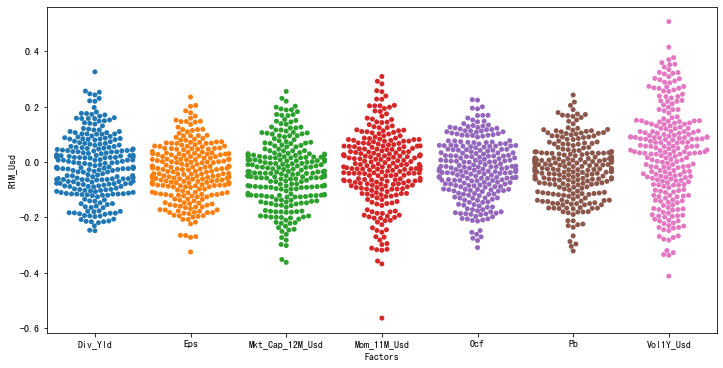

In [19]:
cols=[]
features_short=['date','R1M_Usd']
col=features_short+['Div_Yld','Eps','Mkt_Cap_12M_Usd','Mom_11M_Usd','Ocf','Pb','Vol1Y_Usd']
data_corr=data_ml[col]
data_corr = data_corr.groupby('date').corr()[['R1M_Usd']].reset_index()
data_corr= data_corr[data_corr.level_1.str[-7:] != "R1M_Usd"]
#label
data_corr.rename(columns={'level_1': "Factors"},inplace=True)
plt.figure(figsize=(12,6))
_=sns.swarmplot(x="Factors", y="R1M_Usd", data=data_corr)

More importantly, when seeking to work with supervised learning (as we will do most of the time), the link of some features with the dependent variable can be further characterized by the smoothed conditional average because it shows how the features impact the label.

Suppose there is only one feature $X$ and that we seek a model $Y=f(X)+error$, where variables are real-valued. The function $f$ that minimizes the average squared error $E(Y-f(X))^2$ is the so-called regression function (see Section 2.4 in Hastie, Tibshirani, and Friedman (2009)):

$$
f(x)=E(Y|X=x)
$$

we plot two illustrations of this function when the **dependent variable** ($Y$) is the one month ahead return. The first one pertains to the average market capitalization over the past year and the second to the volatility over the past year as well. Both predictors have been uniformized

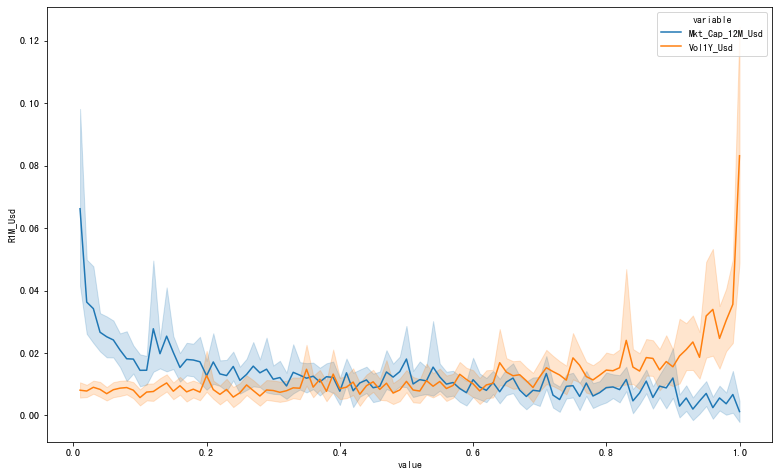

In [20]:
unpivoted_data_ml = pd.melt(data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Vol1Y_Usd']], id_vars='R1M_Usd')
plt.figure(figsize=(13,8))
_=sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable')

The two variables have a close to monotonic impact on future returns. Returns, on average, decrease with market capitalization (thereby corroborating the so-called size effect). The reverse pattern is less pronounced for volatility: the curve is rather flat for the first half of volatility scores and progressively increases, especially over the last quintile of volatility values (thereby contradicting the low-volatility anomaly).

One important empirical property of features is **autocorrelation** (or absence thereof). A high level of autocorrelation for one predictor makes it plausible to use simple imputation techniques when some data points are missing.

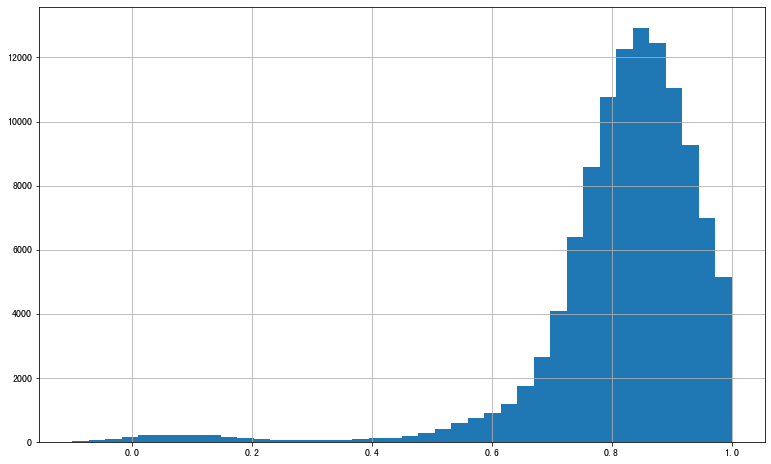

In [16]:
cols=[]
cols = ['stock_id'] + list(data_ml.iloc[:,3:95].columns)
data_hist_acf=pd.melt(data_ml[cols], id_vars='stock_id').groupby(['stock_id','variable']).apply(lambda x: x['value'].autocorr(lag=1))
plt.figure(figsize=(13,8))
_=data_hist_acf.hist(bins=40,range=[-0.1,1])

Given the large number of values to evaluate, the above chunk is quite time-consuming. The output shows that predictors are highly autocorrelated: most of them have a first order autocorrelation above 0.80.

## 4.2 Missing data

Similarly to any empirical discipline, portfolio management is bound to face missing data issues. 

First of all, there are mainly two ways to deal with missing data: **removal** and **imputation**. Removal is agnostic but costly, especially if one whole instance is eliminated because of only one missing feature value. Imputation is often preferred but relies on some underlying and potentially erroneous assumption.

A simplified classification of imputation is the following:

- A basic imputation choice is the median (or mean) of the feature for the stock over the past available values.

- In time series contexts with views towards backtesting, the most simple imputation comes from previous values: if $x_t$ is missing, replace it with $x_{t+1}$.

- Medians and means can also be computed over the cross-section of assets.

- Many techniques rely on some modelling assumptions for the data generating process.

A few words of caution:

- Interpolation should be avoided at all cost.

- Nevertheless, there are some feature types for which imputation from past values should be avoided. First of all, returns should not be replicated. 

There are some cases that can require more attention. Let us consider the following fictitious sample of dividend yield:

![title](fig/fig2.png)

In this case, the yield is released quarterly, in March, June, September, etc. But in June, the value is missing. The problem is that we cannot know if it is missing because of a genuine data glitch, or because the firm simply did not pay any dividends in June. Thus, imputation from past value may be erroneous here. 

There is no perfect solution but a decision must nevertheless be taken. For dividend data, three options are:

- Keep the previous value.

- Extrapolate from previous observations.

- Set the value to zero.

Tests can be performed to evaluate the relative performance of each option. It is also important to remember these design choices. There are so many of them that they are easy to forget. Keeping track of them is obviously compulsory. In the ML pipeline, the scripts pertaining to data preparation are often key because they do not serve only once!

Finally, we mention that many packages exist in R that deal with data imputation: Amelia, imputeTS, mice, mtsdi, simputation and VIM. The interested reader can have a look at these.

## 4.3 Outlier detection

The topic of outlier detection is also well documented and has its own surveys (Hodge and Austin (2004), Chandola, Banerjee, and Kumar (2009) and M. Gupta et al. (2014)) and a few dedicated books (Aggarwal (2013) and Rousseeuw and Leroy (2005), though the latter is very focused on regression analysis).

Again, incredibly sophisticated methods may require a lot of efforts for possibly limited gain. Simple heuristic methods, as long as they are documented in the process, may suffice. They often rely on **‘hard’ thresholds**:

- for one given feature (possibly filtered in time), any point outside the interval $[\mu-m\sigma, \mu+m\sigma]$ can be deemed an outlier.The multiple value $m$ usually belongs to the set $\{3,5,10\}$ which is of course arbitrary.

- ikewise, if the largest value is above $m$ times the second-to-largest, then it can also be classified as an outlier.

- for a given small threshold $q$,any value outside the $[q,1-q]$ quantile range can be considered outliers.

This latter idea was popularized by **winsorization**.

$$
\tilde{x}_{i}=\left\{\begin{array}{ll}
x_{i} & \text { if } x_{i} \in\left[x^{(q)}, x^{(1-q)}\right] \\
x^{(q)} & \text { if } x_{i}<x^{(q)} \\
x^{(1-q)} & \text { if } x_{i}>x^{(1-q)}
\end{array}\right.
$$

The range for $q$ is usually (0.5%,5%) with 1% and 2% being the most often used.

The winsorization stage must be performed on a feature-by-feature and a date-by-date basis. However, keeping a time series perspective is also useful. 

**We conclude this subsection by recalling that true outliers (i.e., extreme points that are not due to data extraction errors) are valuable because they are likely to carry important information.**

## 4.4 Feature engineering

Feature engineering is a very important step of the portfolio construction process. Computer scientists often refer to the saying “garbage in, garbage out.” It is thus paramount to prevent the ML engine of the allocation to be trained on ill-designed variables.

### 4.4.1 Feature selection

The first step is selection. It is not obvious to determine **which set of predictors to include**.

Then, given a large set of predictors, it seems a sound idea to **filter out unwanted or redundant exogenous variables**. Heuristically, simple methods include:

- computing the correlation matrix of all features and making sure that no (absolute) value is above a threshold (0.7 is a common value) so that redundant variables do not pollute the learning engine;

- carrying out a linear regression and removing the non significant variables (e.g., those with $p$ value above 0.05).

- perform a clustering analysis over the set of features and retain only one feature within each cluster (see Chapter 15).

Both these methods are somewhat reductive and overlook nonlinear relationships. Another approach would be to fit a decision tree (or a random forest) and retain only the features that have a high variable importance.

### 4.4.2 Scaling the predictors

The premise of the need to pre-process the data comes from the large variety of scales in financial data:

- returns are most of the time smaller than one in absolute value;

- stock volatility lies usually between 5% and 80%;

- market capitalization is expressed in million or billion units of a particular currency;

- accounting values as well;

- accounting ratios can have inhomogeneous units;

- synthetic attributes like sentiment also have their idiosyncrasies.

While it is widely considered that monotonic transformations of the features have a marginal impact on prediction outcomes, Galili and Meilijson (2016) show that this is not always the case (see also Section 4.8.2). Hence, the choice of normalization may in fact very well matter.

- standardization: $\tilde{x}_{i}=\left(x_{i}-m_{x}\right) / \sigma_{x}$

- min-max rescaling over $[0,1]$: $\tilde{x}_{i}=\left(x_{i}-\min (\mathbf{x})\right) /(\max (\mathbf{x})-\min (\mathbf{x}))$

- min-max rescaling over $[-1,1]$: $\tilde{x}_{i}=2 \frac{x_{i}-\min (\mathbf{x})}{\max (\mathbf{x})-\min (\mathbf{x})}-1$

- uniformization: $\tilde{x}_{i}=F_{\mathbf{x}}\left(x_{i}\right)$  where $F_{\mathbf{x}}$ is the empirical c.d.f. of $x$.

Sometimes, it is possible to apply a **logarithmic transform** of variables with both large values (market capitalization) and large outliers. The scaling can come after this transformation. Obviously, this technique is prohibited for features with negative values.

It is often advised to scale inputs so that they range in [0,1] before sending them through the training of **neural networks for instance**.

**Uniformization is sometimes presented differently: for a given characteristic and time, characteristic values are ranked and the rank is then divided by the number of non-missing points.**

Scaling features across dates should be proscribed. This would completely alter and dilute the cross-sectional content of the features.

## 4.5 Labelling

### 4.5.1 Simple labels

There are several ways to define labels when constructing portfolio policies. Of course, the finality is the portfolio weight, but it is rarely considered as the best choice for the label. 

Usual labels in factor investing are the following:

- raw asset returns

- future relative returns (versus some benchmark: market-wide index, or sector-based portfolio for instance). One simple choice is to take returns minus a cross-sectional mean or median

- the probability of positive return (or of return above a specified threshold)

- the probability of outperforming a benchmark (computed over a given time frame)

- the binary version of the above: YES (outperforming) versus NO (underperforming)

- risk-adjusted versions of the above: Sharpe ratios, information ratios, MAR or CALMAR ratios (see Section 12.3).

When creating binary variables, it is often tempting to create a test that compares returns to zero (profitable versus non profitable). This is not optimal because it is very much time-dependent. In good times, many assets will have positive returns, while in market crashes, few will experience positive returns, thereby creating very unbalanced classes. It is a better idea to split the returns in two by comparing them to their time-$t$ median (or average). In this case, the indicator is relative and the two classes are much more balanced.

As we will discuss later in this chapter, these choices still leave room for additional degrees of freedom. Should the labels be rescaled, just like features are processed? What is the best time horizon on which to compute performance metrics?

### 4.5.2 Categorical label

In a typical ML analysis, when $y$ is a proxy for future performance, the ML engine will try to minimize some distance between the predicted value and the realized values. 

Sometimes, it can be interesting not to focus on raw performance proxies, like returns or Sharpe ratios, but on discrete investment decisions, which can be derived from these proxies. A simple example (decision rule) is the following:

$$
y_{t, i}=\left\{\begin{array}{rll}
-1 & \text { if } & \hat{r}_{t, i}<r_{-} \\
0 & \text { if } & \hat{r}_{t, i} \in\left[r_{-}, r_{+}\right] \\
+1 & \text { if } & \hat{r}_{t, i}>r_{+}
\end{array}\right.
$$

In this case, the final output can be considered as categorical or numerical because it belongs to an important subgroup of categorical variables: the ordered categorical (**ordinal**) variables. If $y$ is taken as a number, the usual regression tools apply.

When $y$ is treated as a non-ordered (**nominal**) categorical variable, then a new layer of processing is required because ML tools only work with numbers.Hence, the categories must be recoded into digits.

![title](fig/fig3.png)

In classification tasks, the output has a larger dimension. For each instance, it gives the probability of belonging to each class assigned by the model. As we will see in Chapters 6 and 7, this is easily handled via the softmax function.

From the standpoint of allocation, handling categorical predictions is not necessarily easy. For **long-short portfolios**, plus or minus one signals can provide the sign of the position. For long-only portfolio, two possible solutions: 

- work with binary classes (in versus out of the portfolio) or 

- adapt weights according to the prediction: zero weight for a -1 prediction, 0.5 weight for a 0 prediction and full weight for a +1 prediction. 

Weights are then of course normalized so as to comply with the budget constraint.

### 4.5.3 The triple barrier method

We conclude this section with an advanced labelling technique mentioned in De Prado (2018). The idea is to consider the full dynamics of a trading strategy and not a simple performance proxy. 

The rationale for this extension is that often money managers implement P&L triggers that cash in when gains are sufficient or opt out to stop their losses. Upon inception of the strategy, three barriers are fixed:

- one above the current level of the asset (magenta line), which measures a reasonable expected profit;

- one below the current level of the asset (cyan line), which acts as a stop-loss signal to prevent large negative returns

- and finally, one that fixes the horizon of the strategy after which it will be terminated (black line).

![title](fig/fig4.png)


If the strategy hits the first (resp. second) barrier, the output is +1 (resp. -1), and if it hits the last barrier, the output is equal to zero or to some linear interpolation (between -1 and +1) that represents the position of the terminal value relative to the two horizontal barriers. 

Computationally, this method is much more demanding, as it evaluates a whole trajectory for each instance. Again, it is nonetheless considered as more realistic because trading strategies are often accompanied with automatic triggers such as stop-loss, etc.

### 4.5.5 Return horizons

This subsection deals with one of the least debated issues in factor-based machine learning models: horizons. 

Several horizons come into play during the whole ML-driven allocation workflow: **the horizon of the label**, **the estimation window** (chronological depth of the training samples) and **the holding periods**.

This debate should also be considered when working with ML algorithms (see for instance Geertsema and Lu (2020)). The issues of estimation windows and holding periods are mentioned later in the book, in Chapter 12. Naturally, in the present chapter, the horizon of the label is the important ingredient. Heuristically, there are four possible combinations if we consider only one feature for simplicity:

- oscillating label and feature
- oscillating label, smooth feature (highly autocorrelated);
- smooth label, oscillating feature;
- smooth label and feature.

Of all of these options, the last one is probably preferable because it is more robust, **all things being equal**. By all things being equal, we mean that in each case, a model is capable of extracting some relevant pattern. A pattern that holds between two slowly moving series is more likely to persist in time. Thus, since features are often highly autocorrelated (cf Figure 4.3), combining them with smooth labels is probably a good idea. 

To illustrate how critical this point is, we will purposefully use 1-month returns in most of the examples of the book and show that the corresponding results are often disappointing. These returns are very weakly autocorrelated while 6-month or 12-month returns are much more persistent and are better choices for labels.

Theoretically, it is possible to understand why that may be the case. For simplicity, let us assume a single feature $x$ that explains returns $r:r_{t+1}=f(x_t)+e_{t+1}$. If $x$ is highly autocorrelated and the noise embeded in $e_{t+1}$ is not too large, then the two-period ahead return $(1+r_{t+1})(1+r_{t+2})-1$ may carry more signal than $r_{t+1}$ because the relationship with $x_t$ has diffused and compounded through time. Consequently, it may also be beneficial to embed memory considerations directly into the modelling function, as is done for instance in Matthew F. Dixon (2020). We discuss some practicalities related to autocorrelations in the next section.

## 4.6 Handling persistence

While we have separated the steps of feature engineering and labelling in two different subsections, it is probably wiser to **consider them jointly**.

One important property of the dataset processed by the ML algorithm should be the consistency of persistence between features and labels. Intuitively, the autocorrelation patterns between the label $y_{t,n}$ (future performance) and the features $X_{t,n}^{(k)}$ should not be too distant.

One problematic example is when the dataset is sampled at the monthly frequency (not unusual in the money management industry) with the labels being monthly returns and the features being risk-based or fundamental attributes. 

In this case, the **label is very weakly autocorrelated**, while **the features are often highly autocorrelated**. In this situation, most sophisticated forecasting tools will arbitrage between features which will probably result in a lot of noise. In linear predictive models, this configuration is known to generate bias in estimates (see the study of Stambaugh (1999) and the review by Gonzalo and Pitarakis (2018)).

Among other more technical options, there are two simple solutions when facing this issue: **either introduce autocorrelation into the label**, or **remove it from the features**. Again, the first option is not advised for statistical inference on linear models. Both are rather easy econometrically:

- to **increase the autocorrelation of the label**, compute performance over longer time ranges. For instance, when working with monthly data, considering annual or biennial returns will do the trick.

- to **get rid of autocorrelation**, the shortest route is to resort to differences/variations: $\Delta x_{t, n}^{(k)}=x_{t, n}^{(k)}-x_{t-1, n}^{(k)}$ One advantage of this procedure is that it makes sense, economically: variations in features may be better drivers of performance, compared to raw levels.

A mix between persistent and oscillating variables in the feature space is of course possible, as long as it is driven by economic motivations.

## 4.7 Extension

### 4.7.1 Transforming feature

The feature space can easily be augmented through simple operations. One of them is lagging, that is, considering older values of features and assuming some memory effect for their impact on the label.

In some cases (e.g., insufficient number of features), it is possible to consider ratios or products between features. Accounting ratios like price-to-book, book-to-market, debt-to-equity are examples of functions of raw features that make sense.

Another way to increase the feature space (mentioned above) is to consider variations. Variations in sentiment, variations in book-to-market ratio, etc., can be relevant predictors because sometimes, the change is more important than the level.

### 4.7.2 Macro-economic variables

Finally, we discuss a very important topic. The data should never be separated from the context it comes from (its environment). In classical financial terms, this means that a particular model is likely to depend on the overarching situation which is often proxied by macro-economic indicators. One way to take this into account at the data level is simply to multiply the feature by an exogenous indicator $z_t$ and in this case, the new predictor is:

$$
\breve{x}_{t, n}^{(k)}=z_{t} \times x_{t, n}^{(k)}
$$

This technique is used by Gu, Kelly, and Xiu (2020b) who use 8 economic indicators (plus the original predictors ($z_t=1$). This increases the feature space ninefold.

Another route that integrates shifting economic environments is conditional engineering. 

$$
y_{t, i}=\left\{\begin{array}{rll}
-1 & \text { if } & \hat{r}_{t, i}<r_{-} \\
0 & \text { if } & \hat{r}_{t, i} \in\left[r_{-}, r_{+}\right] \\
+1 & \text { if } & \hat{r}_{t, i}>r_{+}
\end{array}\right.
$$

In times of turbulence, it might be a good idea to increase both $r_{+}$ (buy threshold) and $r_{-}$ (sell threshold) so that the labels become more conservative: it takes a higher return to make it to the buy category, while short positions are favored. One such example of dynamic thresholding could be

$$
r_{t, \pm}=r_{\pm} \times e^{\pm \delta\left(\mathrm{VIX}_{t}-\mathrm{VI} \overline{\mathrm{X}}\right)}
$$where $VIX_t$ is the time-$t$ value of the VIX, while $\mathrm{VI} \overline{\mathrm{X}}$ is some average or median value. When the VIX is above its average and risk seems to be increasing, the thresholds also increase. The parameter $\delta$ tunes the magnitude of the correction. In the above example, we assume $r_{-}<0<r_{+}$


### 4.7.3 Active learning

We end this section with the notion of active learning. To the best of our knowledge, it is not widely used in quantitative investment, but the underlying concept is enlightening, hence we dedicate a few paragraphs to this notion for the sake of completeness.

For instance, it is free to have access to images, but the labelling of the content of the image (e.g., “a dog,” “a truck,” “a pizza,” etc.) is costly because it requires human annotation. In formal terms, $X$ is cheap but the corresponding $y$ is expensive.

As is often the case when facing cost constraints, an evident solution is greed. Ahead of the usual learning process, a filter (often called query) is used to decide which data to label and train on (possibly in relationship with the ML algorithm). The labelling is performed by a so-called oracle (which/who knows the truth), usually human. This technique that focuses on the most informative instances is referred to as **active learning**. The term **active** comes from the fact that **the learner does not passively accept data samples but actively participates in the choices of items it learns from**.

In active learning, one key question is, **how does the learner choose the instances to be labelled?** Heuristically, the answer is by picking those observations that maximize learning efficiency. In binary classification, a simple criterion is the probability of belonging to one particular class. If this probability is far from 0.5, then the algorithm will have no difficulty of picking one class (even though it can be wrong). The interesting case is when the probability is close to 0.5: the machine may hesitate for this particular instance. Thus, having the oracle label it is useful in this case because it helps the learner in a configuration in which it is undecided. 

Other methods seek to estimate the fit that can be obtained when including particular (new) instances in the training set, and then to optimize this fit.Recalling Section 3.1 in Geman, Bienenstock, and Doursat (1992) on the variance-bias tradeoff, we have, for a training dataset $D$ and one instance $x$ (we omit the bold font for simplicity),

$$
\mathbb{E}\left[(y-\hat{f}(x ; D))^{2} \mid\{D, x\}\right]=\mathbb{E}[\underbrace{(y-\mathbb{E}[y \mid x])^{2}}_{\text {indep. from } D \text { and } \hat{f}} \mid\{D, x\}]+(\hat{f}(x ; D)-\mathbb{E}[y \mid x])^{2}
$$

where the notation $f(x;D)$ is used to highlight the dependence between the model $\hat{f}$ and the dataset $D$: the model has been trained on $D$. The first term is irreducible, as it does not depend on $\hat{f}$. Thus, only the second term is of interest. If we take the average of this quantity, taken over all possible values of $D$
:

$$
\mathbb{E}_{D}\left[(\hat{f}(x ; D)-\mathbb{E}[y \mid x])^{2}\right]=\underbrace{\left(\mathbb{E}_{D}[\hat{f}(x ; D)-\mathbb{E}[y \mid x]]\right)^{2}}_{\text {squared bias }}+\underbrace{\mathbb{E}_{D}\left[\left(\hat{f}(x, D)-\mathbb{E}_{D}[\hat{f}(x ; D)]\right)^{2}\right]}_{\text {variance }}
$$

**If this expression is not too complicated to compute, the learner can query the $x$ that minimizes the tradeoff.** Beyond this approach (which is limited because it requires the oracle to label a possibly irrelevant instance), many other criteria exist for querying and we refer to section 3 from Settles (2009) for an exhaustive list.

**One final question: is active learning applicable to factor investing?** 

One straightfoward answer is that data cannot be annotated by human intervention. Thus, the learners cannot simulate their own instances and ask for corresponding labels.

## 4.8 Additional code and results

### 4.8.1 Impact of rescaling: graphical representation

We start with a simple illustration of the different scaling methods. We generate an arbitrary series and then rescale it. The series is not random so that each time the code chunk is executed, the output remains the same.

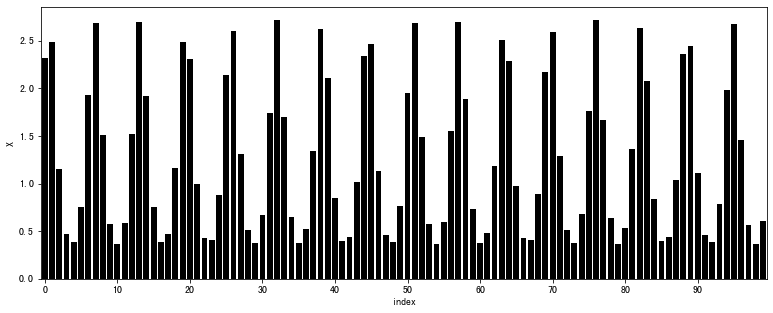

In [8]:
length = 100
x = np.exp(np.sin(np.linspace(1,length,length)))
data = pd.DataFrame(data=x,columns=['X'])
data.reset_index(inplace=True)
plt.figure(figsize=(13,5))
_=sns.barplot(y="X", data=data, x="index", color='black')
_=plt.xticks(data['index'][::10])

We define and plot the scaled variables below.

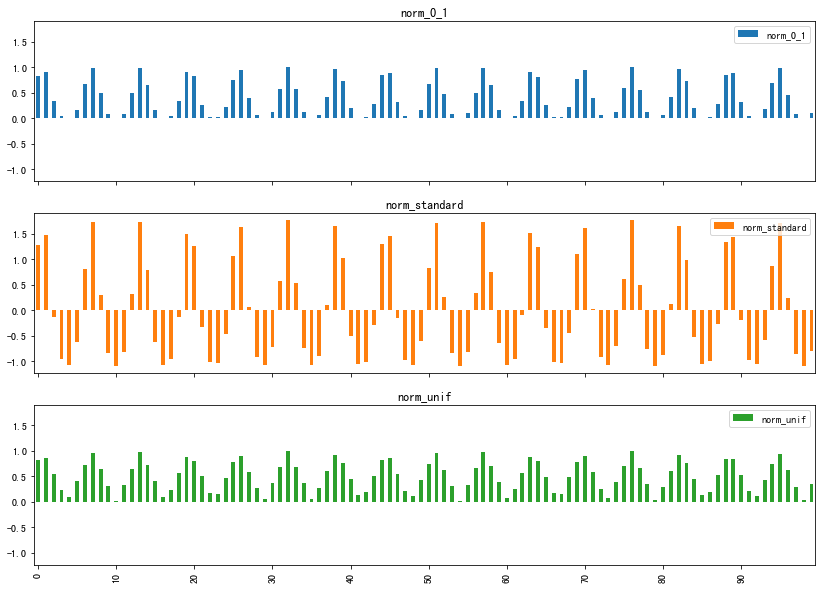

In [10]:
def norm_0_1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))
def norm_unif(x):
    return (ECDF(x)(x))
def norm_standard(x):
    return (x- np.mean(x))/np.std(x)

data_norm=pd.DataFrame.from_dict(dict( # ensembling numpy arrays into a dict and then a pd dataframe
index=np.linspace(1,length,length), # creating the index
norm_0_1=norm_0_1(x), # normalisation [0,1]
norm_standard=norm_standard(x), # standardisation
norm_unif=norm_unif(x))) # Uniformisation
data_norm.iloc[:,1:4].plot.bar( figsize=(14,10), subplots=True, sharey=True, sharex=True); # Plot
plt.xticks(data['index'][::10]);   # reshape the xtick every 10 observations

Finally, we look at the histogram of the newly created variables.

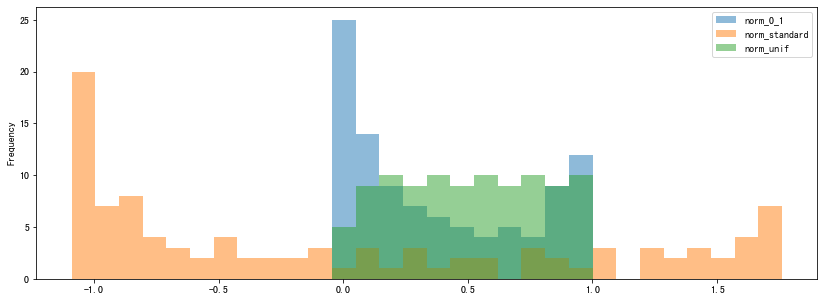

In [12]:
_=data_norm.iloc[:,1:4].plot.hist(alpha=0.5, bins=30, figsize=(14,5))

With respect to shape, the green and red distributions are close to the original one. It is only the support that changes: the min/max rescaling ensures all values lie in the $[0,1]$ interval. In both cases, the smallest values (on the left) display a spike in distribution. By construction, this spike disappears under the uniformization: the points are evenly distributed over the unit interval.

### 4.8.2 Impact of rescaling: toy example

To illustrate the impact of choosing one particular rescaling method, we build a simple dataset, comprising 3 firms and 3 dates.

In [13]:
cap=np.array([10,50,100, # Market capitalization
              15,10,15,
              200,120,80])
returns=np.array([0.06,0.01,-0.06, # Return values
        -0.03,0.00,0.02,
        -0.04,-0.02,0.00])
date=np.array([1,2,3,1,2,3,1,2,3]) # Dates
firm=np.array([1,1,1,2,2,2,3,3,3]) # Firms (3 lines for each)
toy_data=pd.DataFrame.from_dict(dict(firm=firm,date=date,cap=cap,returns=returns, # Aggregation of data
cap_norm=norm_0_1(cap),
cap_u=norm_unif(cap)))
print(toy_data)

   firm  date  cap  returns  cap_norm     cap_u
0     1     1   10     0.06  0.000000  0.222222
1     1     2   50     0.01  0.210526  0.555556
2     1     3  100    -0.06  0.473684  0.777778
3     2     1   15    -0.03  0.026316  0.444444
4     2     2   10     0.00  0.000000  0.222222
5     2     3   15     0.02  0.026316  0.444444
6     3     1  200    -0.04  1.000000  1.000000
7     3     2  120    -0.02  0.578947  0.888889
8     3     3   80     0.00  0.368421  0.666667


Let’s briefly comment on this synthetic data. We assume that dates are ordered chronologically and far away: each date stands for a year or the beginning of a decade, but the (forward) returns are computed on a monthly basis. The first firm is hugely successful and multiplies its cap ten times over the periods. The second firm remains stable cap-wise, while the third one plummets. If we look at ‘local’ future returns, they are strongly negatively related to size for the first and third firms. For the second one, there is no clear pattern.

Date-by-date, the analysis is fairly similar, though slightly nuanced.

- On date 1, the smallest firm has the largest return and the two others have negative returns.

- On date 2, the biggest firm has a negative return while the two smaller firms do not.

- On date 3, returns are decreasing with size.

While the relationship is not always perfectly monotonous, there seems to be a link between size and return and, typically, investing in the smallest firm would be a very good strategy with this sample.

In [14]:
X=toy_data.cap_norm.to_numpy()
X=sm.add_constant(X)
model = sm.OLS(returns, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     4.265
Date:                Sat, 23 Oct 2021   Prob (F-statistic):             0.0778
Time:                        23:32:15   Log-Likelihood:                 19.892
No. Observations:                   9   AIC:                            -35.78
Df Residuals:                       7   BIC:                            -35.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.014      0.912      0.3

In [15]:
X=toy_data.cap_u.to_numpy()
X=sm.add_constant(X)
model = sm.OLS(returns, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     6.672
Date:                Sat, 23 Oct 2021   Prob (F-statistic):             0.0363
Time:                        23:32:49   Log-Likelihood:                 20.764
No. Observations:                   9   AIC:                            -37.53
Df Residuals:                       7   BIC:                            -37.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0457      0.022      2.056      0.0